<a href="https://colab.research.google.com/github/valterlucena/recuperacao-informacao/blob/master/stemming/token_stemming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import RSLPStemmer
nltk.download('rslp')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

import collections
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


# Introdução

Nesta atividade continuaremos exercitando conceitos sobre processamento de texto. Os dados utilizados são de textos de notícias resultados da utilização de técnicas de *crawling* e *scrapping*. Os scripts para a coleta desses dados podem ser encontrados [neste](https://github.com/valterlucena/ri_lab_01) repositório.

Primeiramente, vamos importar os dados que utilizaremos.

In [0]:
DATA_URL = 'https://raw.githubusercontent.com/valterlucena/ri_lab_01/master/output/results.csv'
news = pd.read_csv(DATA_URL).replace(np.nan, '', regex=True)

# Criando os tokens

Para a criação dos tokens, continuaremos a utilizar a função `tokenize` da biblioteca [NLTK](https://www.nltk.org/). Além de diferenciar letras maiúsculas e minúsculas, consideraremos como token toda sequência de caracteres que:
* não possuem símbolos especiais ou números, com exceção das palavras que possuem hífen
* não formam *stopwords* 





In [4]:
toker = RegexpTokenizer('''\w+[-']*\w*''')
stop_words = stopwords.words('portuguese')

def isValid(token):
  return token not in stop_words and not bool(re.search(r'\d', token))

word_list = []
for new in news.text:
  tokens = [token for token in toker.tokenize(new) if isValid(token)]
  word_list.extend(tokens)
  
word_list

['O',
 'Ministério',
 'Público',
 'Estado',
 'São',
 'Paulo',
 'requereu',
 'junto',
 'Justiça',
 'processo',
 'penal',
 'corre',
 'Vara',
 'Juizado',
 'Especial',
 'Embu',
 'Artes',
 'SP',
 'youtuber',
 'Nando',
 'Moura',
 'condenado',
 'injúria',
 'difamação',
 'estudante',
 'interior',
 'São',
 'Paulo',
 'chamou',
 'vagabunda',
 'três',
 'vezes',
 'vídeo',
 'publicado',
 'internet',
 'visto',
 'mil',
 'pessoas',
 'A',
 'pena',
 'requerida',
 'promotoria',
 'paulista',
 'é',
 'dois',
 'anos',
 'detenção',
 'O',
 'episódio',
 'ocorreu',
 'final',
 'processo',
 'número',
 'parado',
 'janeiro',
 'deste',
 'ano',
 'Isso',
 'porque',
 'advogados',
 'estudante',
 'ofendida',
 'youtuber',
 'levaram',
 'quase',
 'dois',
 'anos',
 'conseguir',
 'entregar',
 'citação',
 'réu',
 'conhecido',
 'defensor',
 'ideais',
 'direita',
 'governo',
 'Jair',
 'Bolsonaro',
 'Durante',
 'tempo',
 'oficiais',
 'Justiça',
 'buscaram',
 'Moura',
 'endereços',
 'constantes',
 'contas',
 'telefone',
 'celular',


# Estatísticas da coleção

Em posse dos tokens, podemos calcular mais estatísticas da coleção.

In [0]:
total_word_occurrences = len(word_list)

words = pd.DataFrame(word_list, columns=['word'])
word_counts = words.word.value_counts().reset_index()
word_counts.columns = ['word', 'freq']

word_counts['r'] = word_counts.freq.rank(ascending=False, method='first')

pr = (word_counts.freq / total_word_occurrences)
word_counts['Pr %'] = round(pr * 100, 2)

r_pr = word_counts.r * pr
word_counts['r.Pr'] = round(r_pr, 3)

Logo, as 50 palavras mais frequentes da coleção são:

In [6]:
word_counts.head(50)

,word,freq,r,Pr %,r.Pr
0,é,432,1.0,1.19,0.012
1,O,291,2.0,0.80,0.016
2,A,250,3.0,0.69,0.021
3,Brasil,200,4.0,0.55,0.022
4,Lula,176,5.0,0.49,0.024
5,Bolsonaro,163,6.0,0.45,0.027
6,governo,142,7.0,0.39,0.027
7,ser,135,8.0,0.37,0.030
8,sobre,116,9.0,0.32,0.029
9,presidente,112,10.0,0.31,0.031


# Utilizando *stemming* 

Agora, aplicaremos *stemming* aos tokens produzidos. Nesta técnica, os tokens são reduzidos à seus radicais. Para isto, utilizaremos o RSLPStemmer do módulo `stem` da biblioteca NLTK, que é um *stemmer* para palavras em português.

A fim de facilitar a identificação dos falsos positivos e falsos negativos, criaremos um dicionário que mapeia cada *stem* à uma lista de palavras que, submetidas ao *stemming*, são reduzidas para este mesmo *stem*. 

In [14]:
stemmer = RSLPStemmer()
dicio = collections.OrderedDict()
stem_list = []
for word in word_list:
  stem = stemmer.stem(word)
  stem_list.append(stem)
  if stem in dicio.keys() and word not in dicio[stem]:
    dicio[stem].append(word)
  else:
    dicio[stem] = [word]

pairs = sorted(dicio.items(), key = lambda x: len(x[1]), reverse=True)
for pair in pairs[0:15]:
  print(pair[0], ' - ', ', '.join(pair[1]))

exib  -  exibida, exibe, exibia, exibiu, exibindo, exibiam, exibidora, Exibição, exibir
particip  -  participar, participei, participou, participado, participamos, participaram, participação
vend  -  venda, vender, vendia, vendido, vendas, vendidas, vendida
prev  -  previstas, prevê, prevista, previa, prever, prevendo, previamente
determin  -  determinação, determinar, determinado, determinações, determinados, determinou
divulg  -  divulgação, divulgados, divulgadas, divulgada, divulgou, divulgado
represent  -  representante, representa, representados, representantes, representada, representativos
funcion  -  funcionários, funcionava, funcionar, funcionamento, funcionou, funcionalismo
divid  -  dividido, divididas, dividindo, divide, dividir, dividida
envi  -  enviado, enviadas, envio, enviar, enviados, enviada
destac  -  destacando, destacou, destacaram, destaca, destacar, destacava
salv  -  salvou, salvando, salvado, salvaram, Salvamento, salvamento
encontr  -  encontro, encontrará, 

A busca foi feita manualmente no dicionário. Acima mostramos apenas uma amostra de seu conteúdo para demonstrar como os dados estão organizados, portanto, os exemplos seguintes não resultantes da análise desta amostra.

Alguns dos falsos positivos encontrados foram (em negrito):

* **mach**  -  ['machismo', 'machista', **'Machado', 'machado'**]
* **fer**  -  ['ferida', '**fera**', 'feriram', 'feridos']
* **so**  -  ['so', 'sozinho', 'sozinhos', '**Soares**']
* **mont**  -  ['**monte**', 'montadoras', 'montagem']
* **lid**  -  ['lidar', 'lida', '**lidera**']
* **tra**  -  ['traiu', 'traição', '**tratores**']
* **dou**  -  ['**doutora', 'doutor**', 'dou']
* **carn**  -  ['carne', 'carnes', '**Carneiro**']
* **far**  -  ['**farinha**', 'Faria', 'faria']
* **médic**  -  ['médico', 'Médico', '**Médici**']
* **tem**  -  ['**Temer**', 'temas', 'tema']

Alguns falsos negativos encontrados foram:

* abord  -  ['aborda'], abordá-l  -  ['abordá-la']
* academ  -  ['academia'], acadêm  -  ['acadêmica']
* acess  -  ['acesso', 'acessem', 'acessível'], acessibil  -  ['acessibilidade']
* acid  -  ['acidente', 'acidentes'], acident  -  ['acidental']
* acompanh  -  ['acompanhou', 'acompanho', 'acompanhamos', 'acompanhando'], acompanhá-l  -  ['acompanhá-los']
* acontec  -  ['acontecendo', 'acontecem'], aconteç  -  ['aconteça', 'aconteçam']
* acredit  -  ['acredito', 'acredita', 'acreditou'], acredita-s  -  ['Acredita-se']
* adot  -  ['adotava', 'adotadas', 'adotados', 'adotando', 'adota'], adoç  -  ['adoções', 'adoção']
* advocac  -  ['advocacia'], advog  -  ['advogados', 'Advogados']
* agind  -  ['agindo'], agir  -  ['agiram'],  agiss  -  ['agissem']

Os falsos positivos e negativos influenciam diretamente nos resultados de uma consulta. Nos falsos positivos, palavras de signficados diferentes são reduzidas ao mesmo radical, e nos falsos negativos, palavras que possuem semelhança semântica são reduzidas a radicais diferentes. Por exemplo, como identificado nos falsos positivos, uma consulta por **machismo** poderia conter resultados sobre **machado**, já que ambas foram reduzidas ao mesmo radical. 

# Curvas de frequência

Consideraremos como melhor valor da constante `c` para palavras e bigramas, a média dos valores de `r.Pr`. Utilizaremos este valor como estimativa de `r`, a fim de comparar os resultados esperados da Lei de Zipf com os dados reais coletados.

## *Stems*

Inicialmente, vamos calcular as estatísticas de coleção para os *stems*, assim como o melhor valor de `c`.

In [15]:
total_stem_occurrences = len(stem_list)

stems = pd.DataFrame(stem_list, columns=['stem'])
stem_counts = stems.stem.value_counts().reset_index()
stem_counts.columns = ['stem', 'freq']

stem_counts['r'] = stem_counts.freq.rank(ascending=False, method='first')

pr = (stem_counts.freq / total_stem_occurrences)
stem_counts['Pr %'] = round(pr * 100, 2)

r_pr = stem_counts.r * pr
stem_counts['r.Pr'] = round(r_pr, 3)
best_c_stems = np.mean(r_pr)
round(best_c_stems, 3)

0.158

Calculado o valor, vamos utilizá-lo para prever o rank `r` de cada *stem*.

In [0]:
stem_counts['pred'] = best_c_stems / pr

Plotando o gráfico, temos:

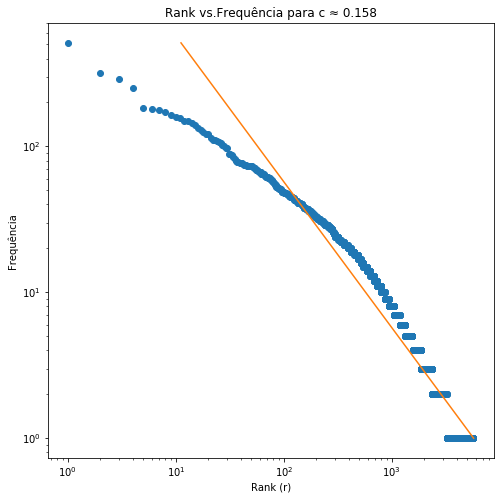

In [17]:
f, ax = plt.subplots(figsize=(8,8))
ax.set(xscale="log", yscale="log")
plt.plot(stem_counts["r"], stem_counts["freq"], linestyle="", marker="o")
plt.plot(stem_counts["pred"], stem_counts["freq"], linestyle="-", marker="")
plt.title('Rank vs.Frequência para c ≈ {0:.3f}'.format(best_c_stems))
plt.xlabel('Rank (r)')
plt.ylabel('Frequência')
plt.show()

Vemos que Lei de Zipf não se ajusta bem aos *stems*, errando mais previsões do que para as palavras. Para palavras, a lei falhava para as palavras com mais alta frequência, e, para os *stems*, falha com *stems* de frequência não tão alta. 

## Bigramas

Inicialmente, vamos criar os bigramas, sua tabela de frequências e calcular o melhor valor de `c`. Utilizaremos novamente a biblioteca NLTK para isto, mas dessa vez usaremos a função `bigrams`. Continuaremos utilizando a mesma regra de validade dos tokens para os bigramas. 

In [25]:
bigram_list = []
for new in news.text:
  tokens = [stemmer.stem(token) for token in toker.tokenize(new) if isValid(token)]
  bigram_list.extend(list(nltk.bigrams(tokens)))

bigrams_stems = [bigram[0] + ' ' + bigram[1] for bigram in bigram_list]

bigrams = pd.DataFrame(bigrams_stems, columns=['bigram'])
bigram_counts = bigrams.bigram.value_counts().reset_index()
bigram_counts.columns = ['bigram', 'freq']
bigram_counts['r'] = bigram_counts.freq.rank(ascending=False, method='first')
bigram_total_occurence = bigram_counts.freq.sum()
bigram_pr = (bigram_counts.freq / bigram_total_occurence)
bigram_counts['Pr %'] = round(bigram_pr * 100, 2)
bigram_r_pr = bigram_counts.r * bigram_pr
bigram_counts['r.Pr'] = round(bigram_r_pr, 3)
best_c_bigrams = np.mean(bigram_r_pr)
round(best_c_bigrams, 3)

0.436

Utilizando o valor encontrado para predizer o rank de cada bigrama, temos:

In [0]:
bigram_counts['pred'] = best_c_bigrams / bigram_pr

Plotando o gráfico, temos:

[]

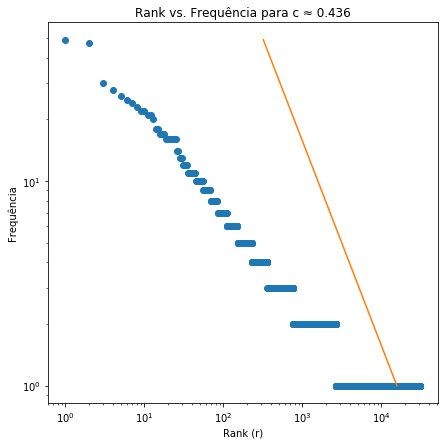

In [27]:
f, ax = plt.subplots(figsize=(7,7))
ax.set(xscale="log", yscale="log")
plt.plot(bigram_counts["r"], bigram_counts["freq"], linestyle="", marker="o")
plt.plot(bigram_counts["pred"], bigram_counts["freq"], linestyle="-", marker="")
plt.title('Rank vs. Frequência para c ≈ {0:.3f}'.format(best_c_bigrams))
plt.xlabel('Rank (r)')
plt.ylabel('Frequência')
plt.plot()

Para os bigramas, percebemos que o ajuste da Lei de Zipf piora em comparação com os *stems* individuais e com os bigramas sem *stems*, já que deixamos de considerar as palavras como independentes.